Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Read data from csv into a pandas dataframe

In [ ]:
neo = pd.read_csv('https://raw.githubusercontent.com/brianga0/Nearest-Earth-Objects/main/neo_v2.csv')

In [ ]:
#Displaying the dataframe
neo

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
#checking the features in the dataset
neo.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [ ]:
#checking the amount of data in the dataset
neo.shape

(90836, 10)

In [ ]:
#checking data type
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


<ipython-input-7-baf6cf0ef6b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(neo.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

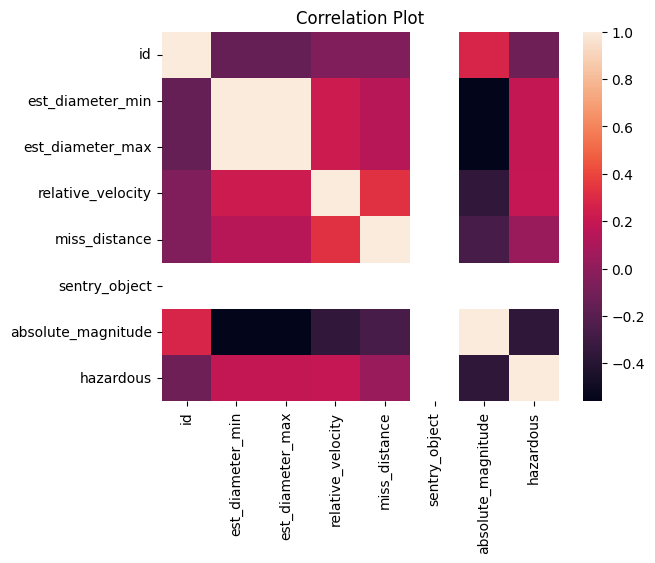

In [ ]:
#generating a correlation matrix
sns.heatmap(neo.corr())
plt.title('Correlation Plot')
plt.show

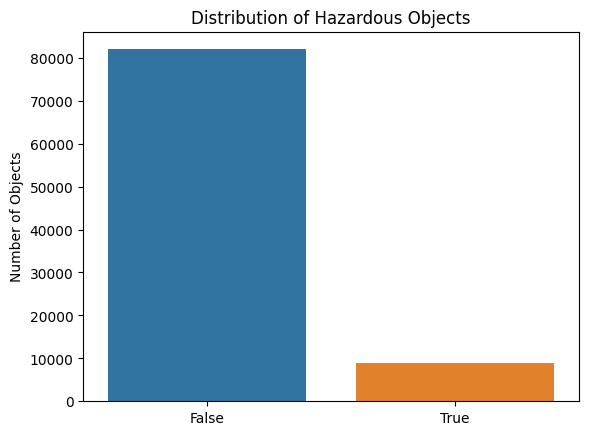

In [ ]:
#visualize the distribution of true and false hazardous
hazardous_count = neo['hazardous'].value_counts()
sns.barplot(x = hazardous_count.index, y = hazardous_count.values, alpha=1)
plt.title('Distribution of Hazardous Objects')
plt.ylabel('Number of Objects')
plt.show()

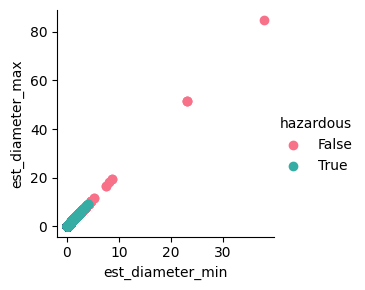

In [ ]:
#creating facetgrid scatter plot to see distribution of est_diameter_min and est_diameter_max for true/false hazardous objects
sns.FacetGrid(neo, hue='hazardous', palette='husl').map(plt.scatter, 'est_diameter_min', 'est_diameter_max').add_legend()
plt.show()

Dropping the id and name columns since they are just identifiers and have no relation in determining whether an object is hazardous or not. Dropping orbiting body and sentry object because they are the same values for all records.

In [ ]:
neo.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'], inplace=True)

Resampling the hazardous data so there is an even distribution when the model is testing and predicting

In [ ]:
#group by the 'hazardous' column and sample 1000 from each group
neo = neo.groupby('hazardous').apply(lambda x: x.sample(n=1000, replace=True)).reset_index(drop=True)

Separating the features from the labels. Leaving out est_diameter_min and est_diameter_max because they are highly correlated.

In [ ]:
#.values is used to extract the dataframe values to a numpy array
X = neo[['relative_velocity', 'miss_distance', 'absolute_magnitude']].values

In [ ]:
#hazardous is the label that the model is trying to predict
y = neo[['hazardous']].values

Splitting the Dataset into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature Scaling - One method to rescale data is to standardize it.

To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [ ]:
#importing all the machine learning algorithms that are being used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#imports for cross validation
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Training the KNN model with training set

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

Performing 5-Fold Cross Validation For KNN

In [ ]:
#number of folds
k = 5
kf = KFold(n_splits=k)

#perform cross validation with knn model
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f'Avg accuracy: {result.mean()}')

Avg accuracy: 0.8385714285714286


KNN - Using the model to make predictions on the test dataset

In [ ]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

Printing classification report for KNN

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.92      0.80      0.85       308
        True       0.81      0.93      0.87       292

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600



Training the Bernoulli NB model with training set

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.ravel())

BernoulliNB()

Performing 5-Fold Cross Validation for BNB

In [ ]:
result = cross_val_score(bnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8678571428571429


BNB - Using the model to make predictions

In [ ]:
# Predicting the Test set results
y_pred_bnb = bnb.predict(X_test)

Printing classification report for BNB

In [ ]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

       False       0.99      0.80      0.89       308
        True       0.83      0.99      0.90       292

    accuracy                           0.90       600
   macro avg       0.91      0.90      0.89       600
weighted avg       0.91      0.90      0.89       600



Training the decision tree model with test set

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Performing 5-Fold cross validation for decision tree

In [ ]:
result = cross_val_score(dt, X_train, y_train, cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8278571428571428


DT - Using the model to make predictions

In [ ]:
# Predicting the Test set results
y_pred_dt = dt.predict(X_test)

DT - Printing classification report

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       0.85      0.85      0.85       308
        True       0.84      0.85      0.84       292

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



Training random forest model with test set

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

Performing 5-Fold cross validation for random forest

In [ ]:
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8414285714285714


RF - Using the model to make predictions

In [ ]:
# Predicting the Test set results
y_pred_rf = rf.predict(X_test)

RF - Printing classification report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.90      0.83      0.86       308
        True       0.83      0.90      0.87       292

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600



Training SVM model with test set and performing 5-Fold cross validation

In [ ]:
#buildiing an svm using a linear kernel
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

#performing cross val
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.8542857142857144


SVM - Using the model to make predictions

In [ ]:
# Predicting the Test set results
y_pred_linear = linear.predict(X_test)

SVM - Printing classification report

In [ ]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

       False       0.97      0.79      0.87       308
        True       0.81      0.97      0.89       292

    accuracy                           0.88       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600



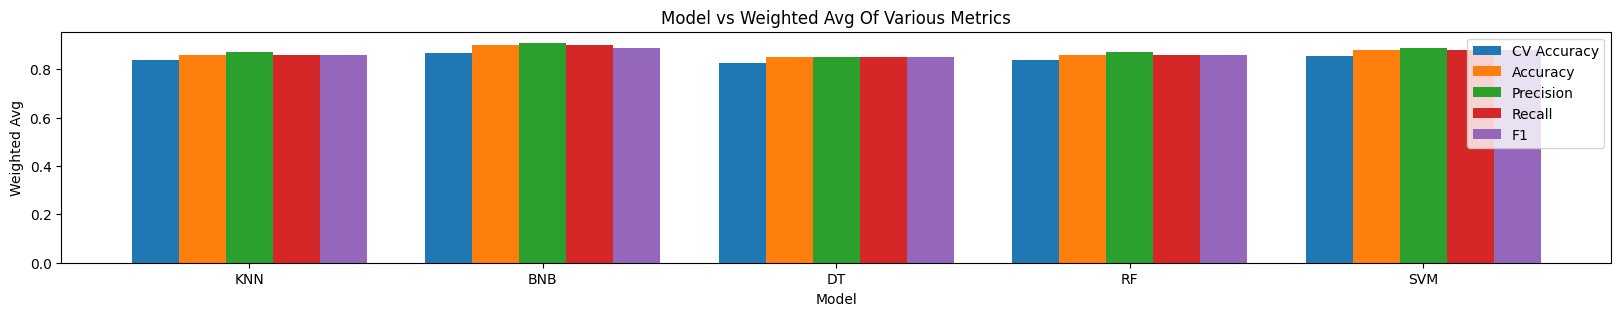

In [ ]:
#Models
X = ['KNN', 'BNB', 'DT', 'RF', 'SVM']

# Collect this information from the classification reports and store them in lists
cv_accuracy = [0.84, 0.868, 0.828, 0.84, 0.854]
accuracy = [0.86, 0.90, 0.85, 0.86, 0.88]
precision = [0.87, 0.91, 0.85, 0.87, 0.89]
recall = [0.86, 0.90, 0.85, 0.86, 0.88]
f1 = [0.86, 0.89, 0.85, 0.86, 0.88]


# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1, cv_accuracy)
n_groups = 5

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, cv_accuracy, bar_width, label='CV Accuracy')
plt.bar(left_positions + bar_width , accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width * 2, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 3, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 4, f1, bar_width, label='F1')
#plt.bar(left_positions + bar_width * 4, cv_accuracy, bar_width, label='CV Accuracy')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


Exporting the model and scaler as pickle

In [ ]:
#importing pickle library
import pickle

#save the trained model and the scaler to files
with open('bnb_model.pkl', 'wb') as f:
  pickle.dump(knn, f)
with open('neo_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)